## PART A (Random points) 

5 Points

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# generate the data
def generate_data(r):
    x1_1 = []
    x1_2 = []
    x2_1 = []
    x2_2 = []
    for i in range(r):
        x1_1.append(np.random.uniform(0,1))
        x1_2.append(np.random.uniform(0,1))
        x2_1.append(np.random.uniform(-1,0))
        x2_2.append(np.random.uniform(-1,0))
        
    data1 = [np.array([1,x1_1[i],x1_2[i],1]) for i in range(r)]
    data2 = [np.array([1,x2_1[i],x2_2[i],0]) for i in range(r)]
    data = data1 + data2

    data = np.array(data)
    np.random.shuffle(data)
    return data

data = generate_data(1000)

In [3]:
data.shape

(2000, 4)

In [4]:
X = data[:, :-1]
y = data[:, -1]

data2=data[:,1:]

admitted = data2[y == 1]
not_admitted = data2[y == 0]

# Plot the data into two classes (0,1)

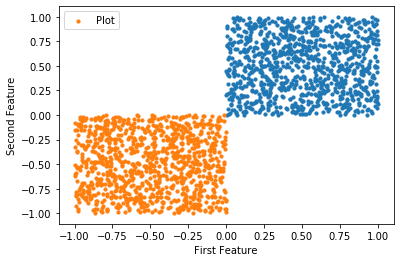

In [34]:
#Plot the data into two classes (0,1)
plt.scatter(admitted[:, 0], admitted[:, 1], s=10 )

plt.scatter(not_admitted[:, 0], not_admitted[:, 1], s=10,label='Plot')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.legend()
plt.show()
y=y.reshape(y.shape[0],1)

In [6]:
# Perform logistic regression
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    return np.dot(x, theta)

def probability(theta, x):
    return sigmoid(net_input(theta, x))


def cost_function( theta, x, y):
   
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost


def gradient( theta, x, y):
    
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)
# Use the lecture slides as reference for equations

# Plot your hypothesis function that classifies the dataset
Use your own logistic regression algorithm to find a hypothesis to separate the classes.


In [7]:

theta = np.zeros((X.shape[1], 1))

def computegradient(theta,x,y):
    w = theta;
    l = 1
    for i in range(50):
        f = cost_function( w, x, y)
        g = gradient( w, x, y)
        w = w - l * g
        #print("iteration : {},w : {}, f : {}, g :{}".format(i,w,f,g))
    return w;



In [8]:
parameters=computegradient(theta,X,y)


In [9]:
#Parameters for Logistic Regression
parameters

array([[-2.35147331e-03],
       [ 3.11454441e+00],
       [ 3.09511556e+00]])

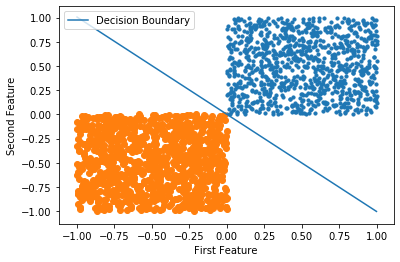

In [10]:
x_values = np.array([np.min(X[:, 1] ), np.max(X[:, 2] )])
x_values=x_values.reshape(2,1)

y_values = - (parameters[0] + np.dot( x_values,parameters[1])) / parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.legend()

plt.scatter(admitted[:, 0], admitted[:, 1], s=10, )
plt.scatter(not_admitted[:, 0], not_admitted[:, 1])
plt.legend()
plt.show()

 # Plotting hypothesis using sklearn library

In [11]:
# Repeat using sklearn library to obtain you hypothesis and plot it
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()



model.fit(X, y)
# predicted_classes = model.predict(X)

sklearn_parameters = model.coef_
print(sklearn_parameters)

[[0.01988987 6.54508812 6.46150942]]


/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


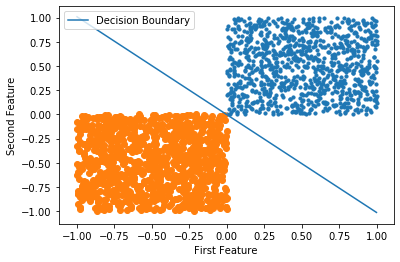

In [12]:
#plotting sklearn graph

sklearn_parameters=sklearn_parameters.reshape(3,1)
x_values = np.array([np.min(X[:, 1] ), np.max(X[:, 2] )])
x_values=x_values.reshape(2,1)

y_values = - (sklearn_parameters[0] + np.dot( x_values,sklearn_parameters[1])) / sklearn_parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.legend()

plt.scatter(admitted[:, 0], admitted[:, 1], s=10, )
plt.scatter(not_admitted[:, 0], not_admitted[:, 1])
plt.legend()
plt.show()

## PART B (Diabetes Dataset)

5 Points

In [13]:
# Load the diabetes dataset
data_2 = pd.read_csv('./data-03-diabetes.csv', error_bad_lines=False)
data_2

# Analyze the features (plot graphs and explain your findings)
# Split data into Training and Test and predict accuracy

,-0.294118,0.487437,0.180328,-0.292929,0,0.00149028,-0.53117,-0.0333333,0.1
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1
...,...,...,...,...,...,...,...,...,...
753,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000,1
754,-0.764706,0.226131,0.147541,-0.454545,0.000000,0.096870,-0.776260,-0.800000,1
755,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000,1
756,-0.882353,0.266332,-0.016393,0.000000,0.000000,-0.102832,-0.768574,-0.133333,0


# Plot individual features corresponding to their Y values

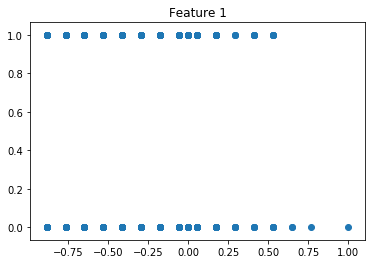

In [14]:
#Finding the corelation between the features

#First Feature

data_csv=np.array(data_2)

x= data_csv[:,0]
y = data_csv[:,8]
plt.title('Feature 1')
plt.scatter(x,y,label='Feature 1')
plt.show()




This feature seems descrete in behavior. For the class 1 , after 0.5 , there is no contribution.


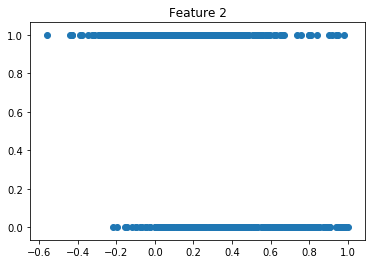

In [15]:
plt.title('Feature 2')
plt.scatter(data_csv[:,1],data_csv[:,8],label='Feature 2')
plt.show()

This feature is mostly continuos for both the classes

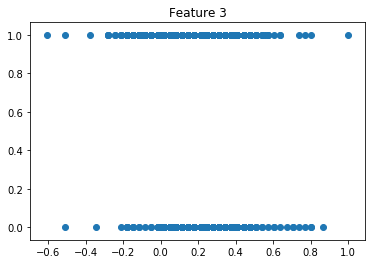

In [35]:
plt.title('Feature 3')
plt.scatter(data_csv[:,2],data_csv[:,8],label='Feature 3')
plt.show()

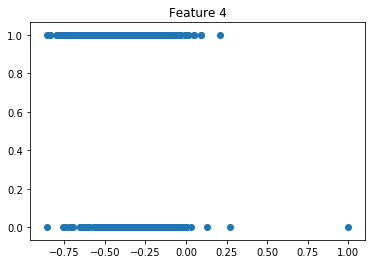

In [17]:
plt.title('Feature 4')
plt.scatter(data_csv[:,3],data_csv[:,8],label='Feature 2')
plt.show()

This feature does not have any impact after 0.25 for both the classes

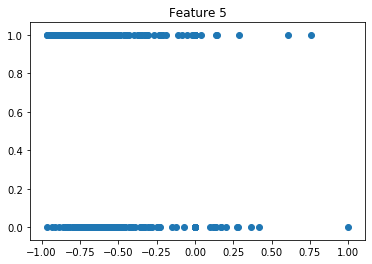

In [18]:
plt.title('Feature 5')
plt.scatter(data_csv[:,4],data_csv[:,8],label='Feature 2')
plt.show()

In [ ]:
This feature has mostly contribute before the 0.5 value.

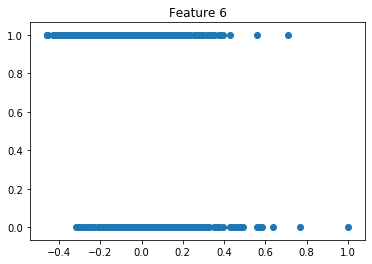

In [19]:
plt.title('Feature 6')
plt.scatter(data_csv[:,5],data_csv[:,8],label='Feature 2')
plt.show()

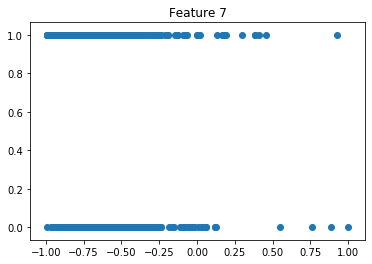

In [20]:
plt.title('Feature 7')
plt.scatter(data_csv[:,6],data_csv[:,8],label='Feature 2')
plt.show()

This feature mostly contribute before the 0 th value for both the classes.

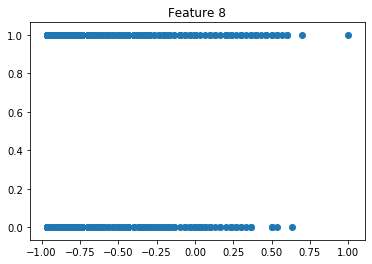

In [21]:
plt.title('Feature 8')
plt.scatter(data_csv[:,7],data_csv[:,8],label='Feature 2')
plt.show()

# Split your dataset into train and test

In [22]:
#Training , Test data split
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_csv, test_size=0.3)

train=train.reshape(530,9)
test=test.reshape(228,9)

# Training using custum code and sklearn

In [23]:

ones= np.ones(train.shape[0]).reshape(530,1)

train2=np.append(ones,train, axis=1)



In [36]:


x_train=train2[:,:-1].reshape(530,9)
y_train=train2[:,9].reshape(530,1);
theta_1 = np.zeros((data_2.shape[1], 1))
model_weight=computegradient(theta_1,x_train,y_train)
np.ones(train.shape[0]).reshape(530,1)


test2=np.append(np.ones(test.shape[0]).reshape(228,1),test,axis=1)

x_test=test2[:,:-1].reshape(228,9);
y_test=test2[:,9].reshape(228,1);

#predicting y values
y_pred=x_test.dot(model_weight)
y_pred=probability(model_weight,x_test)

y_pred = np.array([1 if (val>0.5) else 0 for val in y_pred])
y_test = np.array([1 if (val>0.5) else 0 for val in y_test])



## Custum Code Accuracy 

In [37]:
accuracy=np.array([y_pred==y_test]).mean()

print(accuracy)

0.7412280701754386


In [38]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)

/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Sklearn Accuracy 

In [39]:
accuracy=np.array([predictions==y_test]).mean()

print(accuracy)

0.75
